In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression_cv1.db', mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100, embedding_dim=2)

10/09/2020 20:01:59 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/09/2020 20:02:00 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/09/2020 20:02:02 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/09/2020 20:02:03 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sou

In [7]:
dtfa.num_blocks

618

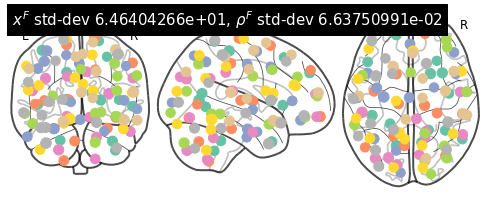

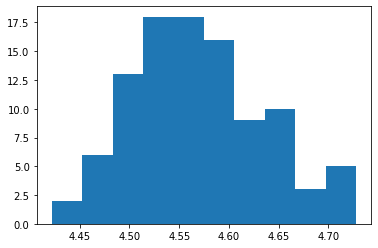

(<nilearn.plotting.displays.OrthoProjector at 0x7fb1581d6bd0>,
 tensor([[ 5.5000e+01, -5.7226e+01, -6.7728e-01],
         [-2.1010e+01, -4.1081e+01, -3.6473e+01],
         [ 2.8158e+01,  2.5051e+01,  5.1379e+01],
         [-4.4526e+01,  2.3899e+01,  9.8823e-01],
         [ 1.9549e+01, -4.7660e+01,  6.7998e+01],
         [-1.4313e+01, -6.4183e+01,  6.3085e+00],
         [ 4.0924e+01, -9.2911e+00,  6.1891e+00],
         [ 3.3983e+01,  1.2399e+01, -3.7504e+01],
         [-3.9920e+01, -3.2419e+01,  5.8161e+01],
         [ 3.7027e+01, -4.8168e+01, -4.7092e+01],
         [ 2.1630e+01,  1.1483e+01,  5.9696e+00],
         [ 1.2222e+01, -6.0967e+01,  1.3402e+01],
         [-1.4239e+01,  5.2270e+01,  3.4993e+01],
         [ 1.4833e+01,  6.3325e+01, -1.1047e+01],
         [-1.1977e+01, -2.0274e+01,  6.0384e+00],
         [-1.4298e+01,  1.1073e+01,  6.3771e+01],
         [-5.8271e+00, -6.4342e+01, -3.7387e+01],
         [ 5.5114e+01, -3.0717e+01,  4.4872e+01],
         [-3.7680e+01, -7.2253e+00,  

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 5e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

10/09/2020 20:06:28 [Epoch 1] (10827ms) Posterior free-energy 1.72888474e+10 = KL from prior 1.12151370e+07 - log-likelihood -1.72776346e+10
10/09/2020 20:06:28 Saving checkpoint...
10/09/2020 20:06:37 [Epoch 2] (8982ms) Posterior free-energy 1.69962967e+10 = KL from prior 3.49123175e+06 - log-likelihood -1.69928079e+10
10/09/2020 20:06:46 [Epoch 3] (8777ms) Posterior free-energy 1.67232205e+10 = KL from prior 1.21598725e+06 - log-likelihood -1.67220050e+10
10/09/2020 20:06:55 [Epoch 4] (8793ms) Posterior free-energy 1.65058765e+10 = KL from prior 7.09868750e+05 - log-likelihood -1.65051679e+10
10/09/2020 20:07:04 [Epoch 5] (8836ms) Posterior free-energy 1.63214633e+10 = KL from prior 5.68823000e+05 - log-likelihood -1.63208950e+10
10/09/2020 20:07:13 [Epoch 6] (8753ms) Posterior free-energy 1.61626819e+10 = KL from prior 5.27099625e+05 - log-likelihood -1.61621586e+10
10/09/2020 20:07:21 [Epoch 7] (8692ms) Posterior free-energy 1.60260311e+10 = KL from prior 4.96392750e+05 - log-likel

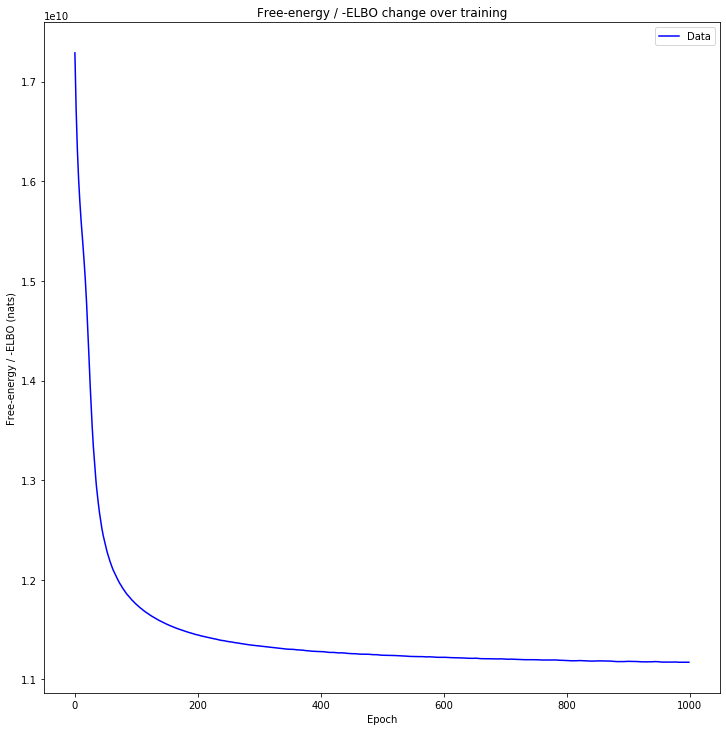

In [10]:
utils.plot_losses(losses)

In [11]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False, held_out_tasks=set(['tones', 'response'])))

10/09/2020 22:33:01 [Epoch 1] (2883ms) Posterior free-energy 8.01366938e+09 = KL from prior 2.84212562e+05 - log-likelihood -8.01338573e+09
10/09/2020 22:33:01 Saving checkpoint...
10/09/2020 22:33:04 [Epoch 2] (2933ms) Posterior free-energy 7.83190374e+09 = KL from prior 2.84545094e+05 - log-likelihood -7.83161958e+09
10/09/2020 22:33:07 [Epoch 3] (2882ms) Posterior free-energy 7.65500979e+09 = KL from prior 2.84210719e+05 - log-likelihood -7.65472563e+09
10/09/2020 22:33:09 [Epoch 4] (2881ms) Posterior free-energy 7.51476429e+09 = KL from prior 2.83466875e+05 - log-likelihood -7.51447962e+09
10/09/2020 22:33:12 [Epoch 5] (2881ms) Posterior free-energy 7.42947994e+09 = KL from prior 2.83921281e+05 - log-likelihood -7.42919578e+09
10/09/2020 22:33:15 [Epoch 6] (2883ms) Posterior free-energy 7.25597235e+09 = KL from prior 2.84217031e+05 - log-likelihood -7.25568768e+09
10/09/2020 22:33:18 [Epoch 7] (2891ms) Posterior free-energy 7.14557850e+09 = KL from prior 2.83646812e+05 - log-likeli

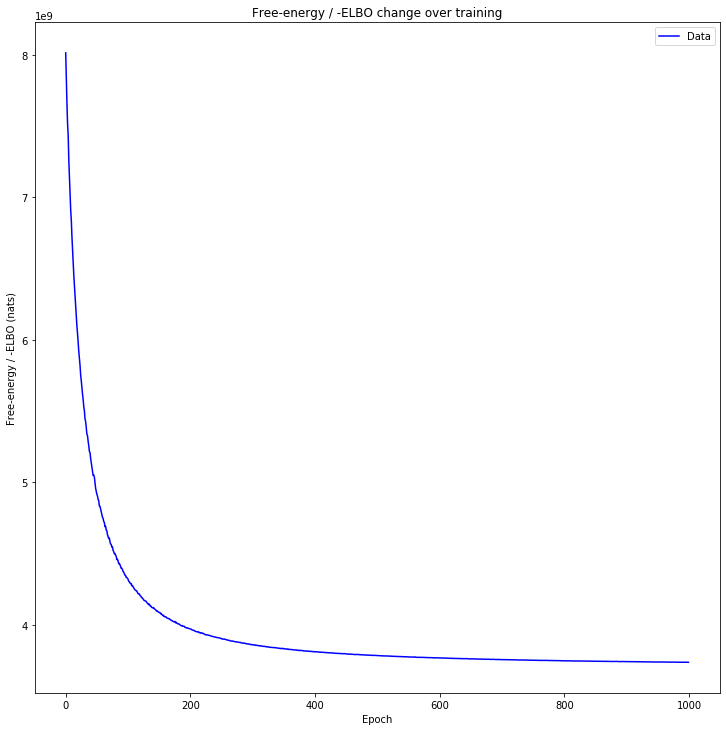

In [12]:
utils.plot_losses(losses)

In [13]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [14]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [15]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

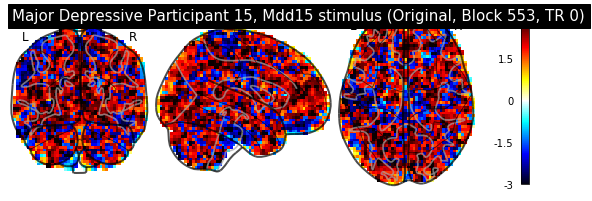

10/09/2020 23:21:09 Reconstruction Error (Frobenius Norm): 1.56008011e+02 out of 9.37374146e+02


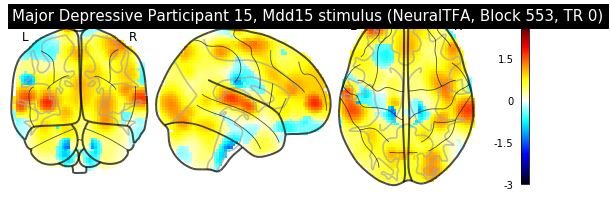

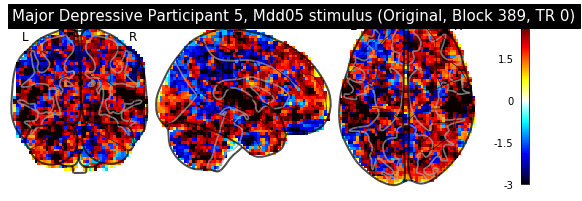

10/09/2020 23:21:12 Reconstruction Error (Frobenius Norm): 1.49265366e+02 out of 8.26651123e+02


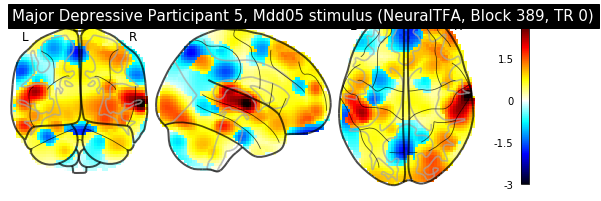

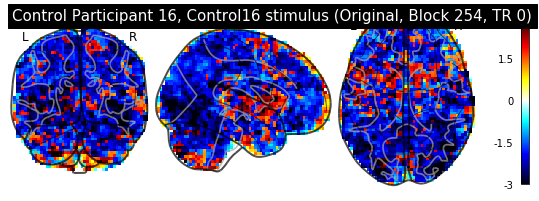

10/09/2020 23:21:14 Reconstruction Error (Frobenius Norm): 2.53914764e+02 out of 9.36929443e+02


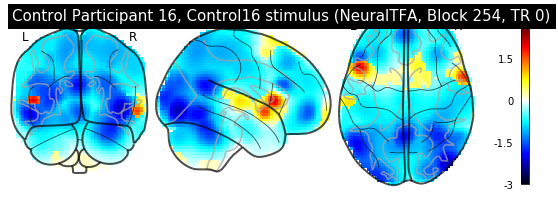

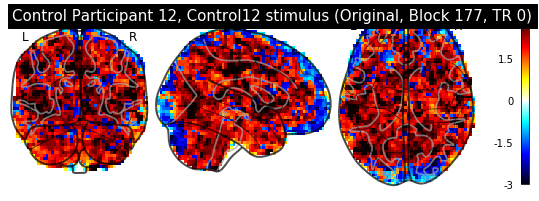

10/09/2020 23:21:17 Reconstruction Error (Frobenius Norm): 1.98482513e+02 out of 9.41816833e+02


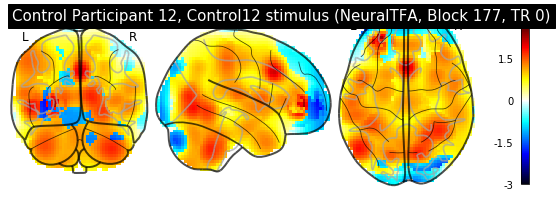

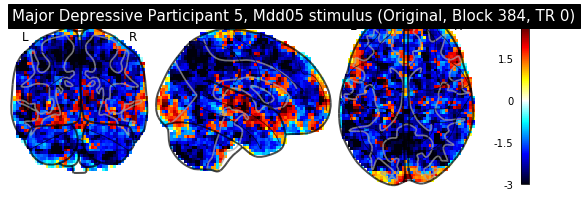

10/09/2020 23:21:20 Reconstruction Error (Frobenius Norm): 1.74588776e+02 out of 7.79319946e+02


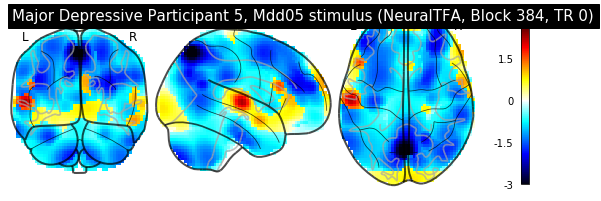

In [16]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

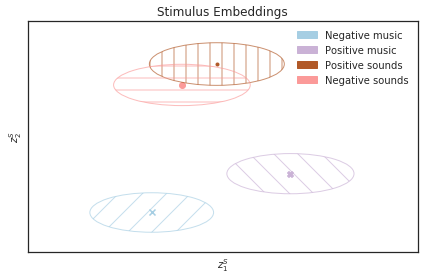

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


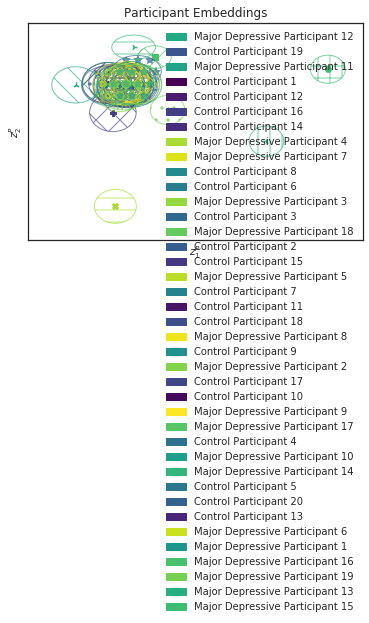

In [18]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

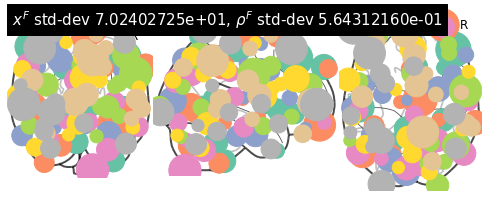

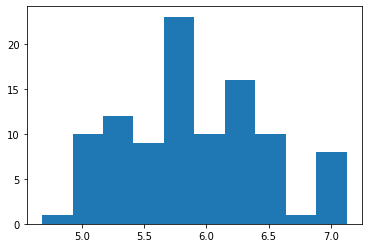

(<nilearn.plotting.displays.OrthoProjector at 0x7fb12cc86dd0>,
 tensor([[  54.4717,  -61.1323,    2.1193],
         [  -4.0743,  -46.2404,  -38.0747],
         [  45.6648,   37.0073,   50.1973],
         [ -45.5921,   36.2996,   -8.1065],
         [   6.0711,  -64.5364,   73.0075],
         [ -17.0882,  -60.9185,   -1.1694],
         [  45.6611,    2.6397,    0.3112],
         [  35.8663,   17.8826,  -46.9383],
         [ -53.1763,  -23.9188,   62.2205],
         [  34.8207,  -37.4287,  -57.8836],
         [   7.3956,   18.5573,   -3.6784],
         [   2.0001,  -50.3430,    8.6764],
         [ -16.0440,   67.2462,   41.1838],
         [  34.9360,   62.6737,  -19.9851],
         [ -10.2373,  -18.2276,    7.6916],
         [  -0.6048,   16.8423,   71.0216],
         [ -20.3616,  -74.4647,  -41.8778],
         [  68.6453,  -40.0050,   41.5118],
         [ -44.1695,   -0.9971,  -12.5654],
         [  30.1655,  -37.1928,  -17.6807],
         [  25.3746,   71.9071,   39.5366],
         [  4

In [19]:
dtfa.visualize_factor_embedding()

In [20]:
dtfa.average_reconstruction_error()

10/09/2020 23:21:47 Average reconstruction error (MSE): 8.90658169e-01
10/09/2020 23:21:47 Average data norm (Euclidean): 1.05002988e+00
10/09/2020 23:21:47 Percent average reconstruction error: 0.342538


(0.8906581686241912, 1.0500298773474526, 0.003425375699671094)

In [21]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

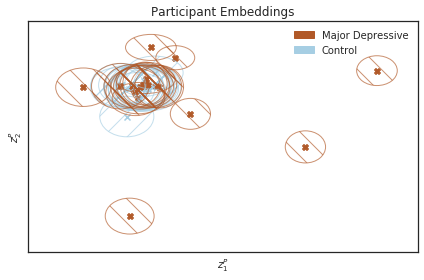

In [22]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [23]:
dtfa.average_reconstruction_error(weighted=False)

10/09/2020 23:22:13 Average reconstruction error (MSE): 7.03841757e+02 +/- 4.74351221e+01
10/09/2020 23:22:13 Average data norm (Euclidean): 8.29830954e+02 +/- 5.52383557e+01
10/09/2020 23:22:13 Percent average reconstruction error: 84.941321 +/- 4.72584495e+00


(array([739.36096191, 716.21374512, 651.01495361, 733.93218994,
        684.76654053, 695.13586426, 726.07775879, 709.23822021,
        630.34301758, 626.21887207, 641.35308838, 632.13653564,
        670.18188477, 722.84625244, 693.7699585 , 680.21472168,
        659.25378418, 687.47906494, 671.59906006, 684.90637207,
        734.67541504, 743.88739014, 751.19451904, 744.88354492,
        706.75860596, 721.15313721, 716.38970947, 702.29418945,
        684.4934082 , 757.48175049, 712.3269043 , 736.21466064,
        679.04376221, 691.42437744, 688.14190674, 680.72283936,
        637.21936035, 638.16503906, 643.21588135, 604.25231934,
        716.53466797, 659.0980835 , 708.3092041 , 721.37457275,
        702.57446289, 716.70983887, 709.50311279, 737.35510254,
        731.75701904, 727.50543213, 732.1026001 , 708.98162842,
        748.3984375 , 757.27099609, 766.07165527, 774.93060303,
        747.49615479, 756.19946289, 756.10192871, 734.14355469,
        710.30200195, 744.73217773, 687.